# **PREDICTING HEART DISEASE FROM CLINICAL AND LABORATORIAL DATA USING KNN**

## **INTRODUCTION**

Importations:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

Loading the dataset:

In [11]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape:

In [12]:
data.shape

(303, 14)

Variables types:

In [13]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## **EDA AND PRE-PROCESSING**




Checking Null Values

In [14]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So, There are no null values in this dataset.

### Outcome variable count:

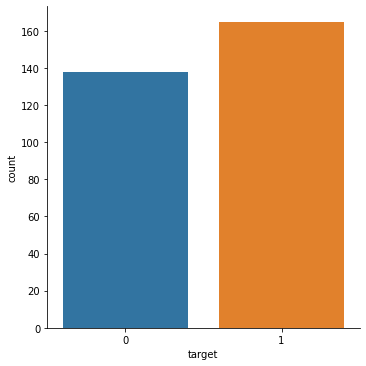

In [15]:
sns.catplot(x='target',kind = 'count', data = data)

There are nearly 160 members who are effected by a heart disease and less than 140, who don't have any heart disease.

### Categorical predictive variables:

sex:

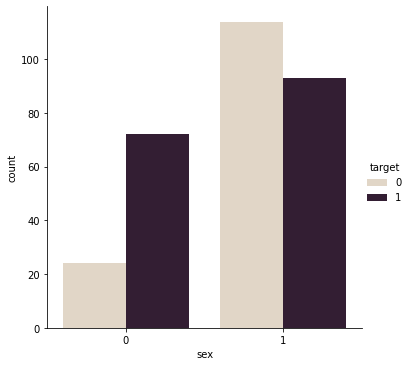

In [16]:
sns.catplot(x='sex', kind = 'count', hue = 'target', data=data,palette = 'ch:.25')

cp:

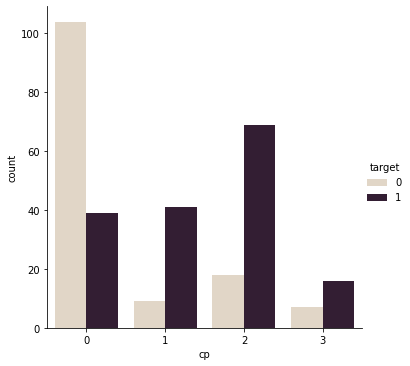

In [17]:
sns.catplot(x='cp', kind = 'count', hue = 'target', data=data,palette = 'ch:.25')

fbs:

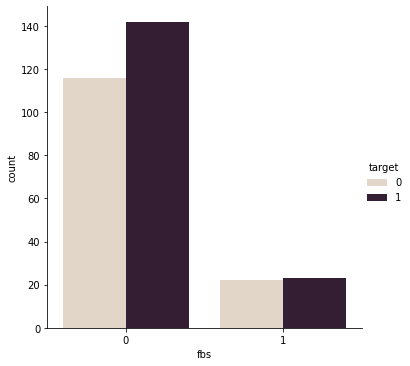

In [18]:
sns.catplot(x='fbs', kind = 'count', hue = 'target', data=data,palette = 'ch:.25')

restecg:

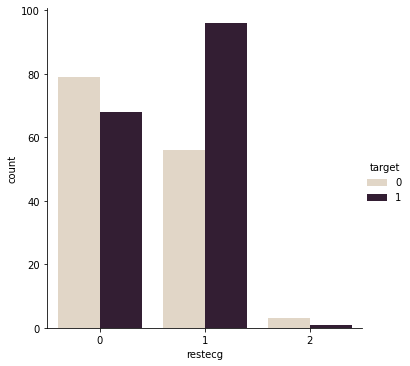

In [19]:
sns.catplot(x='restecg', kind = 'count', hue = 'target', data=data,palette = 'ch:.25')

exang:

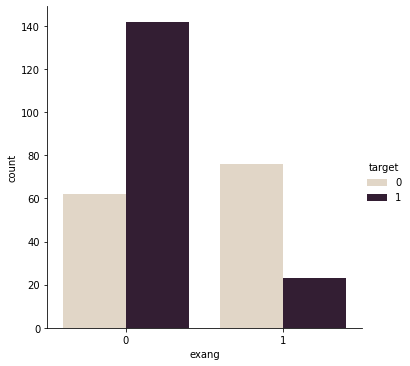

In [20]:
sns.catplot(x='exang', kind = 'count', hue = 'target', data=data,palette = 'ch:.25')

slope:

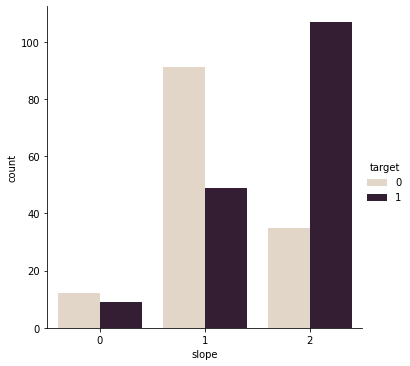

In [21]:
sns.catplot(x='slope', kind = 'count', hue = 'target', data=data,palette = 'ch:.25')

ca:

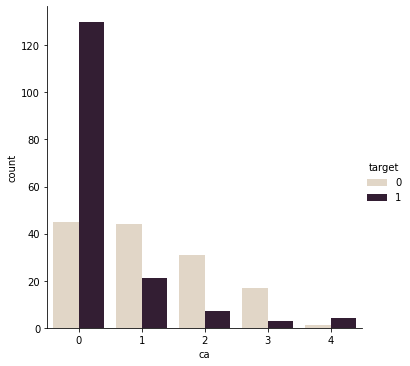

In [23]:
sns.catplot(x='ca', kind = 'count', hue = 'target', data=data,palette = 'ch:.25')

thal:

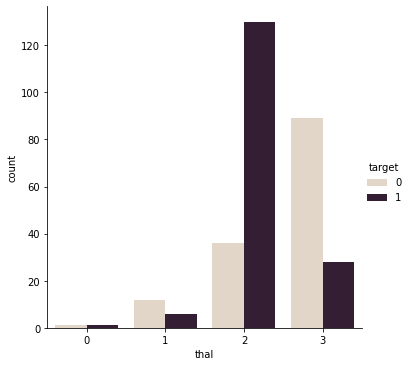

In [24]:
sns.catplot(x='thal', kind = 'count', hue = 'target', data=data,palette = 'ch:.25')

### Distributional predictive variables:




In [30]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


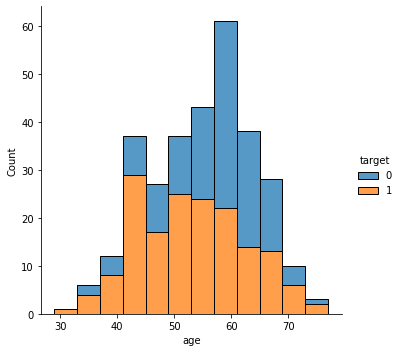

In [32]:
sns.displot(x = 'age', multiple = 'stack', hue = 'target', data = data)

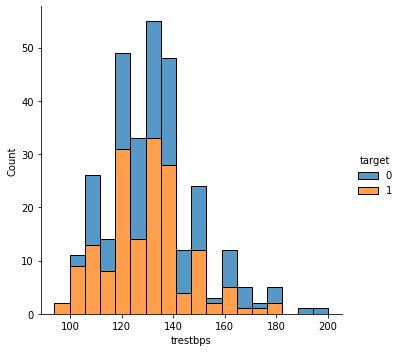

In [33]:
sns.displot(x = 'trestbps', multiple = 'stack', hue = 'target', data = data)

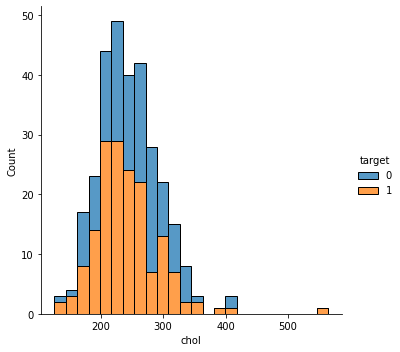

In [34]:
sns.displot(x = 'chol', multiple = 'stack', hue = 'target', data = data)

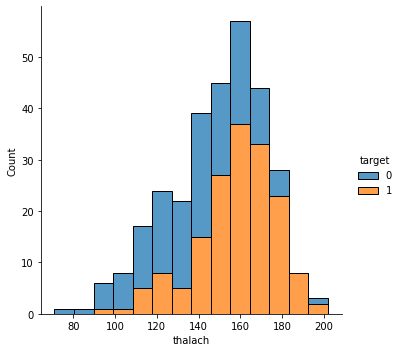

In [35]:
sns.displot(x = 'thalach', multiple = 'stack', hue = 'target', data = data)

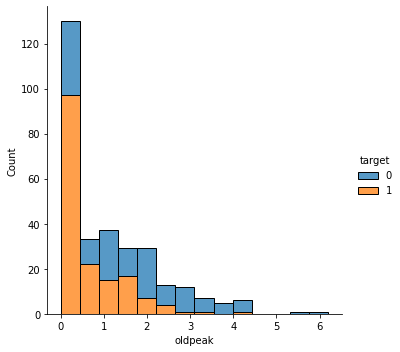

In [36]:
sns.displot(x = 'oldpeak', multiple = 'stack', hue = 'target', data = data)

## **SPLITTING AND PRE-PROCESSING:**

Defining x_train, x_test, y_train and y_test:

In [37]:
x = data.drop('target',axis = 1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

Scaling the data:

In [38]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## **TRAINING THE MODEL:**

Parameters for grid search:

In [39]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform','distance']}

Fiting training data and grid searching:

In [40]:
grid = GridSearchCV(knn, parameters, cv = 4, scoring = 'accuracy')
grid.fit(x_train, y_train)




GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Displayng best parameters:

In [41]:
grid.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

Picking the best model:

In [42]:
model = grid.best_estimator_

## **EVALUATING THE MODEL:**

Model score on test data:

In [43]:
model.score(x_test,y_test)

0.8351648351648352

Confusion matrix:

In [44]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm)
cm.head()

,0,1
0,35,6
1,9,41


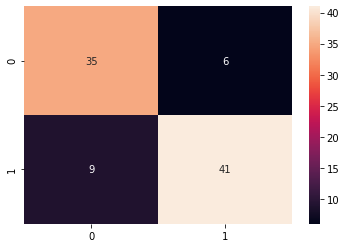

In [45]:
sns.heatmap(cm, annot=True)
plt.show()

Calculating sensitivity, specificity, PPV and NPV:

In [46]:
TP = cm.iloc[1,1]
FP = cm.loc[0,1]
TN = cm.loc[0,0]
FN = cm.loc[1,0]
sensitivity = TP/(TP+FN) * 100
specificity = TN/(TN+FP) * 100
ppv = TP/(TP+FP) * 100
npv = TN/(TN+FN) * 100


Printing sensitivity, specificity, PPV and NPV:

In [47]:
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

Sensitivity: 82.0 %  Specificity: 85.36585365853658 %  positive predictive value: 87.2340425531915 %  negative predictive value: 79.54545454545455 %


AUC score:

In [48]:
model.predict_proba(x_test)[:,1]

array([0.        , 0.33333333, 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.        , 0.33333333,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.33333333, 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.66666667,
       0.        , 0.66666667, 1.        , 0.33333333, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.33333333, 1.        ,
       0.33333333, 0.33333333, 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.33333333, 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.33333333, 0.33333333, 0.66666667,
       0.33333333, 0.66666667, 0.33333333, 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.66666667, 0.33333

In [49]:
probs = model.predict_proba(x_test)[:,1]
auc = metrics.roc_auc_score(y_test, probs)
print(auc)

0.8697560975609757


ROC curve:

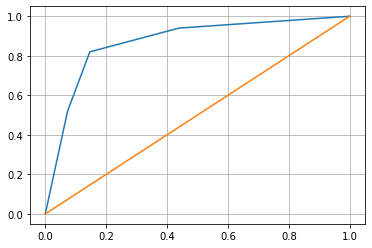

In [50]:
fpr, tpr, _ = metrics.roc_curve(y_test,probs)
plt.figure()
plt.grid()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1])
plt.show()

The above algorithm can be accomodated in a function named KNN-Model. By changing the test data, we can fetch good results with the model.

In [51]:
def KNN_Model(test_size_for_model):
  x = data.drop('target',axis = 1)
  y = data['target']
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = test_size_for_model, random_state = 42)
  sc = StandardScaler().fit(x_train)
  x_train = sc.transform(x_train)
  x_test = sc.transform(x_test)
  knn = KNeighborsClassifier()
  parameters = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform','distance']}
  grid = GridSearchCV(knn, parameters, cv = 4, scoring = 'accuracy')
  grid.fit(x_train, y_train)
  model = grid.best_estimator_
  print('Model Score:',model.score(x_test,y_test))
  predictions = model.predict(x_test)
  cm = metrics.confusion_matrix(y_test,predictions)
  cm = pd.DataFrame(cm)
  sns.heatmap(cm, annot=True)
  plt.show()
  TP = cm.iloc[1,1]
  FP = cm.loc[0,1]
  TN = cm.loc[0,0]
  FN = cm.loc[1,0]
  sensitivity = TP/(TP+FN) * 100
  specificity = TN/(TN+FP) * 100
  ppv = TP/(TP+FP) * 100
  npv = TN/(TN+FN) * 100
  print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

Model Score: 0.9016393442622951


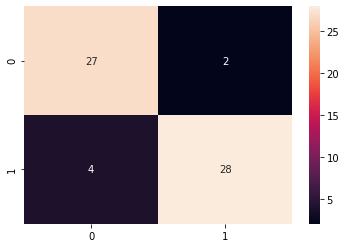

Sensitivity: 87.5 %  Specificity: 93.10344827586206 %  positive predictive value: 93.33333333333333 %  negative predictive value: 87.09677419354838 %


In [52]:
KNN_Model(0.2)

Model score along with Sensitivity, predicted by the model will be the output and test size will be taken as input of the function. Further ROC and AUC Score can be calculated using above method with metrics.